In [1]:
%load_ext autoreload
%autoreload 2

# Basic Model

This notebook is for highlighting the initial data transformations, and show's why a regression model might not be the most interesting problem to solve

In [2]:
import pandas as pd
import numpy as np
from data_prep import *

In [3]:
df = pd.read_csv('data/Foreign_Exchange_Rates.csv', index_col=0, na_values=['ND'])
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [4]:
df = fetch_data(augment=False)
df.head()

,EURO
day,
2000-01-03,0.9847
2000-01-04,0.9700
2000-01-05,0.9676
2000-01-06,0.9686
2000-01-07,0.9714


In [5]:
set_target_regression(df, 1)

,EURO,target
day,,
2000-01-03,0.984700,0.970000
2000-01-04,0.970000,0.967600
2000-01-05,0.967600,0.968600
2000-01-06,0.968600,0.971400
2000-01-07,0.971400,0.972733
...,...,...
2019-12-26,0.900700,0.894900
2019-12-27,0.894900,0.893767
2019-12-28,0.893767,0.892633


In [6]:
work_df = set_target_regression(df, 30)

In [7]:

full_df = expand_columns(work_df, ['EURO'], 4)
full_df.head(n=10)


,EURO,target,EURO_1,EURO_2,EURO_3,EURO_4
day,,,,,,
2000-01-07,0.971400,1.023000,0.968600,0.967600,0.970000,0.984700
2000-01-08,0.972733,1.022200,0.971400,0.968600,0.967600,0.970000
2000-01-09,0.974067,1.014000,0.972733,0.971400,0.968600,0.967600
2000-01-10,0.975400,1.008700,0.974067,0.972733,0.971400,0.968600
2000-01-11,0.968800,1.013700,0.975400,0.974067,0.972733,0.971400
2000-01-12,0.972700,1.015500,0.968800,0.975400,0.974067,0.972733
2000-01-13,0.973700,1.017733,0.972700,0.968800,0.975400,0.974067
2000-01-14,0.987400,1.019967,0.973700,0.972700,0.968800,0.975400
2000-01-15,0.987550,1.022200,0.987400,0.973700,0.972700,0.968800


In [8]:
import torch

In [9]:

x = full_df.drop('target', axis=1).values
target = full_df['target'].values

D_in = x.shape[1]
H = int(D_in/2)
D_out = 1

In [10]:
from torch.utils.data import DataLoader, Dataset
from model_utils import BasicData

In [11]:
if torch.cuda.is_available():
    print("gpu available, using gpu")
    dev = "cuda:0" 
else:  
    dev = "cpu"  
device = torch.device(dev)  

gpu available, using gpu


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, target, percentile=0.5)
training_data = BasicData(X_train, y_train, device)
test_data = BasicData(X_test, y_test, device)
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [13]:
from model_utils import pred_accuracy, train_net 

In [14]:
from plotting_utils import plot_train_test_regression

In [15]:
class Net(torch.nn.Module):
    def __init__(self, inp_d, hid_d, out_d):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(inp_d, hid_d)
        self.fc2 = torch.nn.Linear(hid_d, out_d)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x



model = Net(5, 3, 1)
model.to(device)

train_history, test_history = train_net(
    model, train_loader, test_data, epochs=100, learning_rate=0.01)

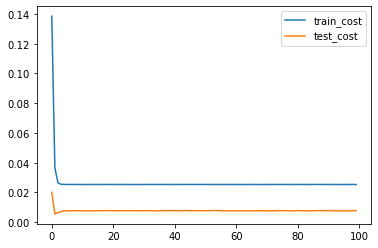

In [16]:
plot_train_test_regression(train_history, test_history)

In [17]:
from sklearn.metrics import r2_score

In [18]:
y_pred = model(test_data.x).squeeze().detach().cpu()
r_squared = r2_score(test_data.y.cpu(), y_pred)
print("R-squared:", r_squared)

R-squared: -0.40717375781690057


In [19]:
import matplotlib.pyplot as plt

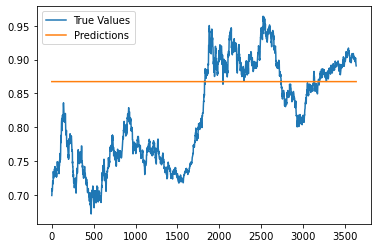

In [20]:
plt.plot(test_data.y.cpu(), label="True Values")
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()

R-Squared scores for 1 day, 10 days, and 30 days are 0.99, 0.969, and 0.925 respectively

## Single Layer Net

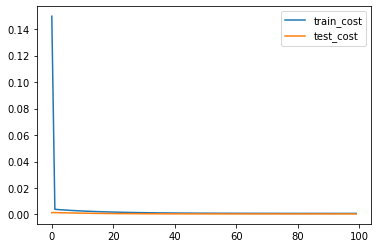

In [21]:
class Net_Basic(torch.nn.Module):
    def __init__(self, inp_d, out_d):
        super(Net_Basic, self).__init__()
        self.fc1 = torch.nn.Linear(inp_d, out_d)

    def forward(self, x):
        x = self.fc1(x)
        return x

model = Net_Basic(5, 1)
model.to(device)

train_history, test_history = train_net(
    model, train_loader, test_data, epochs=100, learning_rate=0.01)
plot_train_test_regression(train_history, test_history)

In [22]:
y_pred = model(test_data.x).squeeze().detach().cpu()
r_squared = r2_score(test_data.y.cpu(), y_pred)
print("R-squared:", r_squared)

R-squared: 0.927772998102821


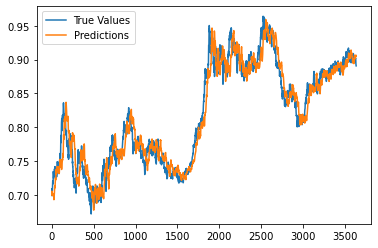

In [23]:
plt.plot(test_data.y.cpu(), label="True Values")
plt.plot(y_pred, label='Predictions')
plt.legend()
plt.show()

R-Squared scores for 1 day, 10 days, and 30 days are 0.99, 0.974, and 0.928 respectively

# Conclustion

Regression is too easy for this problem. We can see that the model is mostly just using the most recent day as its prediction